# Ina section performance

This notebook creates confusion matrixes to compare the perfomance of a model in all the sections of the ina dataset

### Imports

In [17]:
import os
import sys
import itertools

import numpy as np
import pandas as pd
from collections import defaultdict

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

### Definitions

In [18]:
sys.path.insert(0, "../../")
from config import CROPPED_PATH, MODELS_PATH

# Paths
TEST_PATH = os.path.join(CROPPED_PATH, 'ina', 'labeled_images', 'validation_classify')
MODEL_PATH= os.path.join(MODELS_PATH, 'supervised', 'supervised_Encoder_SSIM+MAE3.keras')

results = []

### Functions

In [19]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

def plot_conf_matrix(model, generator, titulo='Confusion matrix'):
    ### RETRIVE TEST LABEL FROM GENERATOR ###
    test_num = sum(1 for _ in generator)
    label_test = []
    pred_test = []
    for i, batch in enumerate(generator):
        X, y = batch
        label_test.append(y)
        predictions = model.predict(X,verbose=0)
        pred_test.append(predictions)

    label_test = np.argmax(np.vstack(label_test), axis=1)


    ### COMPUTE PREDICTIONS ON TEST DATA ###
    pred_test = np.argmax(np.vstack(pred_test), axis=1)
    accuracy=accuracy_score(label_test, pred_test)
    recall=recall_score(label_test, pred_test,pos_label=0)
    specificity=recall_score(label_test, pred_test,pos_label=1)
    precision = precision_score(label_test, pred_test, pos_label=0)
    # pred_test = pred_test[:label_test.shape[0],]
    ### ACCURACY ON TEST DATA ###
    print("-" * 40)
    print('ACCURACY:', accuracy)
    print('RECALL:',recall)
    print('PRECISION:', precision)
    print('SPECIFICITY:',specificity)
    print("-" * 40)
    print("\n")
    ### CONFUSION MATRIX ON TEST DATA ###
    cnf_matrix = confusion_matrix(label_test, pred_test)
    results.append({'Model': titulo, 'Accuracy': accuracy , 'Recall':recall,'Precision':precision,'Specificity':specificity})

    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cnf_matrix, classes=['cell', 'not'], title=titulo)
    plt.title(titulo)
    plt.show()

### Get predictions per section

----------------------------------------
ACCURACY: 0.9393939393939394
RECALL: 1.0
PRECISION: 0.8947368421052632
SPECIFICITY: 0.875
----------------------------------------




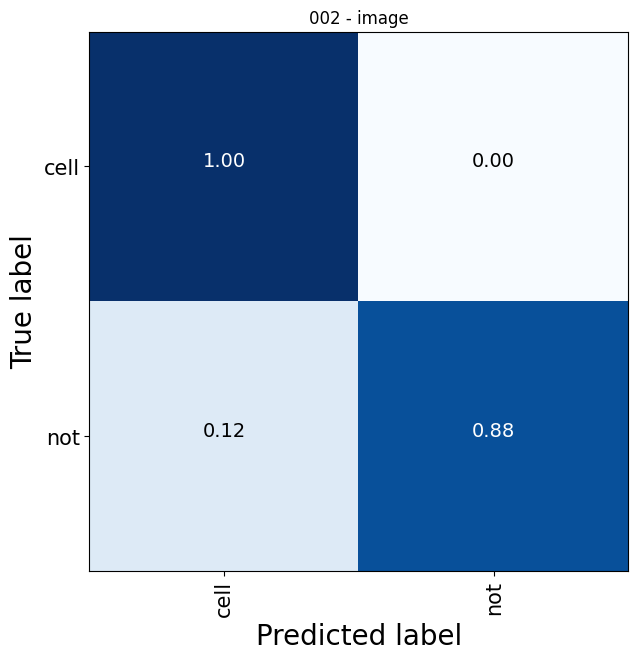

----------------------------------------
ACCURACY: 0.9714285714285714
RECALL: 0.9411764705882353
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




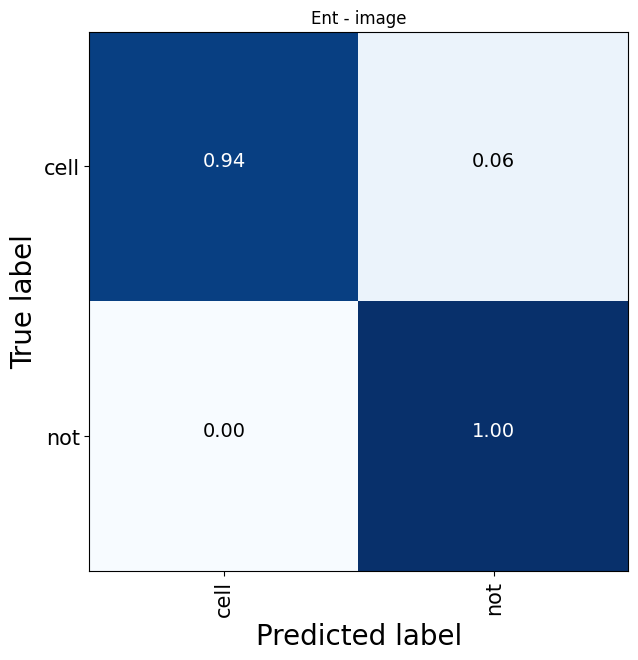

----------------------------------------
ACCURACY: 0.9375
RECALL: 0.875
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




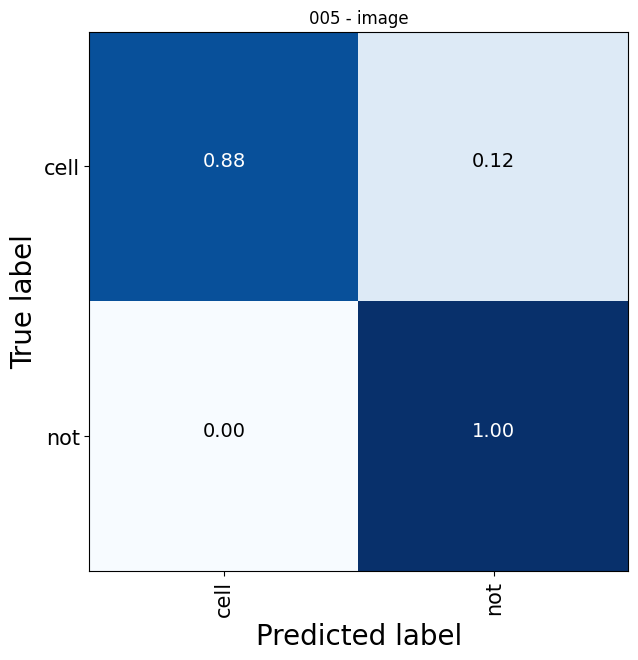

----------------------------------------
ACCURACY: 0.9375
RECALL: 0.9375
PRECISION: 0.9375
SPECIFICITY: 0.9375
----------------------------------------




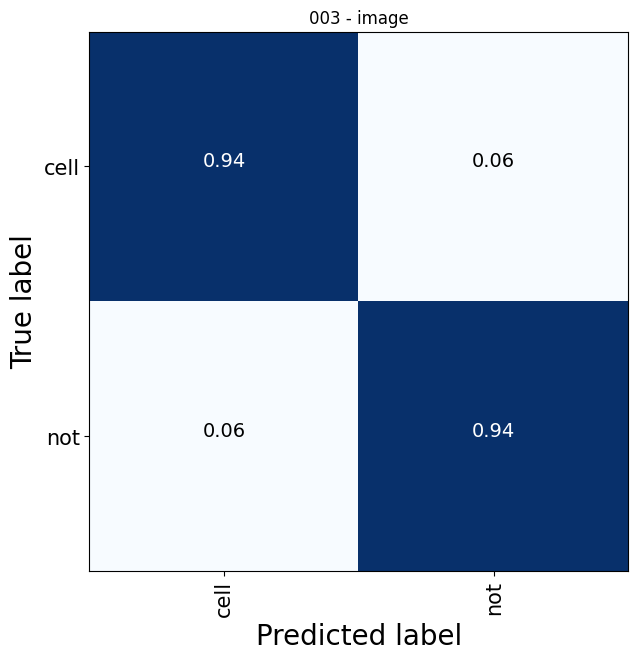

----------------------------------------
ACCURACY: 0.9393939393939394
RECALL: 1.0
PRECISION: 0.8947368421052632
SPECIFICITY: 0.875
----------------------------------------




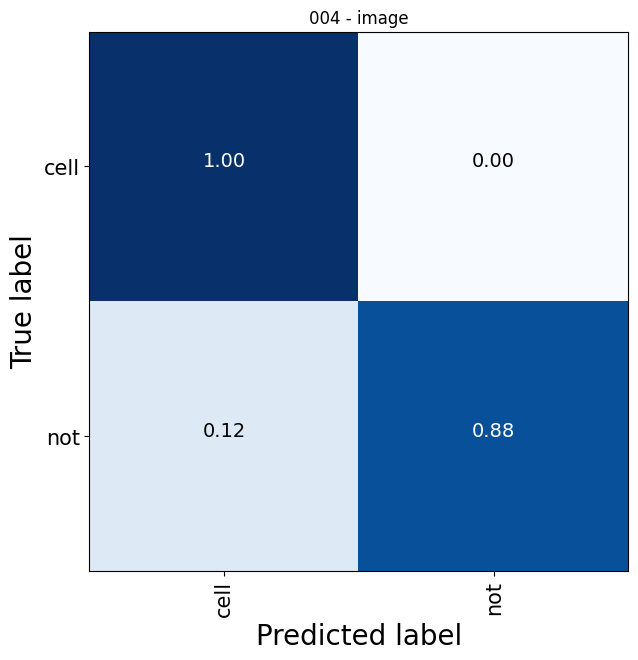

----------------------------------------
ACCURACY: 0.9714285714285714
RECALL: 0.9411764705882353
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




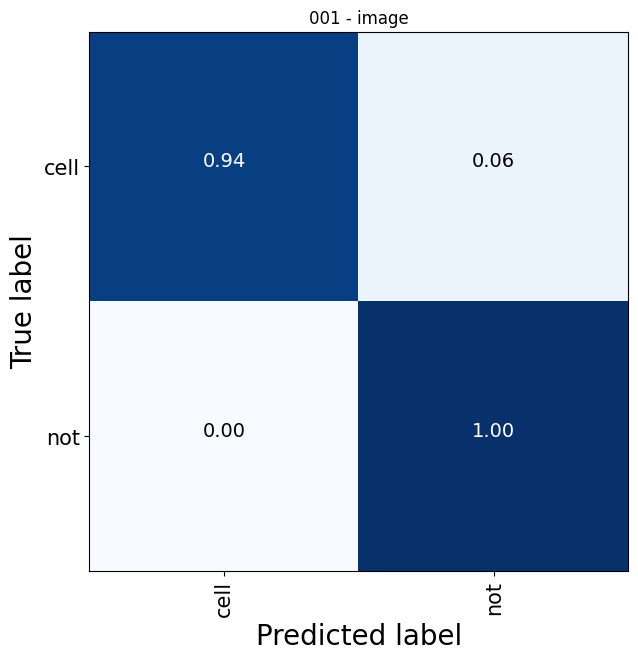

In [20]:
types_images=['cells', 'not']
images_groups = defaultdict(list)

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      prefix = img[:3]
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups[prefix].append([img,y])


images_groups  = dict(images_groups )

model = load_model(MODEL_PATH)
for name,imgs in images_groups.items():
  plot_conf_matrix(model, imgs, name + ' - image')

In [21]:
results_df = pd.DataFrame(results)

print(results_df)


         Model  Accuracy    Recall  Precision  Specificity
0  002 - image  0.939394  1.000000   0.894737       0.8750
1  Ent - image  0.971429  0.941176   1.000000       1.0000
2  005 - image  0.937500  0.875000   1.000000       1.0000
3  003 - image  0.937500  0.937500   0.937500       0.9375
4  004 - image  0.939394  1.000000   0.894737       0.8750
5  001 - image  0.971429  0.941176   1.000000       1.0000


### Get predictions on special cells

In [22]:
types_images=['special_cells']
images_groups=[]

for i in types_images:
  path_tmp=os.path.join(CROPPED_PATH, 'ina', 'labeled_images', i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups.append([img,y])

model = load_model(MODEL_PATH)
label_test = []
pred_test = []
for i, batch in enumerate(images_groups):
    X, y = batch
    label_test.append(y)
    predictions = model.predict(X,verbose=0)
    pred_test.append(predictions)
label_test = np.argmax(np.vstack(label_test), axis=1)
### COMPUTE PREDICTIONS ON TEST DATA ###
pred_test = np.argmax(np.vstack(pred_test), axis=1)
accuracy=accuracy_score(label_test, pred_test)
### ACCURACY ON TEST DATA ###
print("-" * 40)
print("Total special images: ", len(images_groups))
print('ACCURACY:', accuracy)
print("-" * 40)

----------------------------------------
Total special images:  28
ACCURACY: 0.8928571428571429
----------------------------------------
